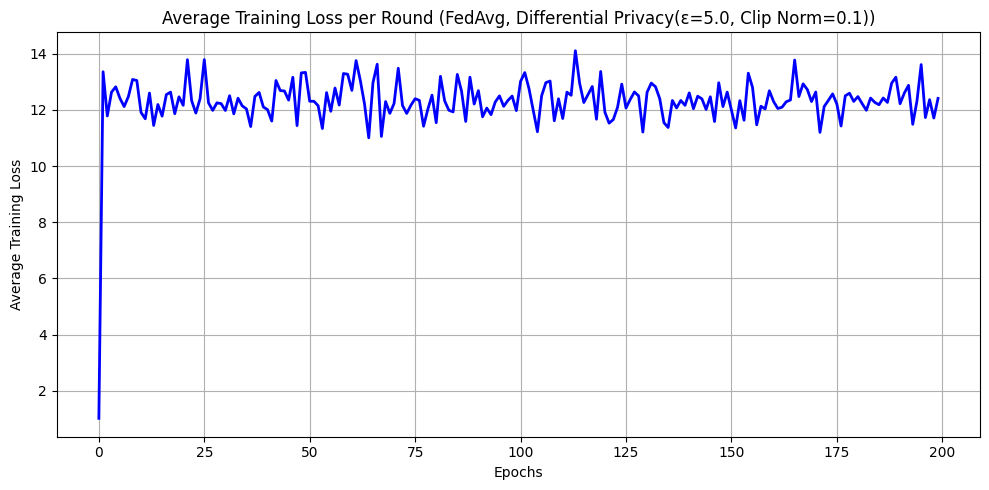

In [3]:
import numpy as np
import matplotlib.pyplot as plt

path = "../../../OpenFedLLM/server_trained_files/output_dp/fedavg_epsilon5.0_clip1.0/alpaca-gpt4_20000_fedavg_c20s2_i10_b16a1_l512_r32a64_20250526064415/training_loss.npy"
# Load training loss
training_loss = np.load(path)  # Update with your path

# Replace -1 with NaN to ignore non-participation
training_loss_with_nan = np.where(training_loss == -1, np.nan, training_loss)

# Compute average loss per round
avg_loss_per_round = np.nanmean(training_loss_with_nan, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_loss_per_round, color="blue", linewidth=2)
plt.title("Average Training Loss per Round (FedAvg, Differential Privacy(ε=5.0, Clip Norm=0.1))")
plt.xlabel("Epochs")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


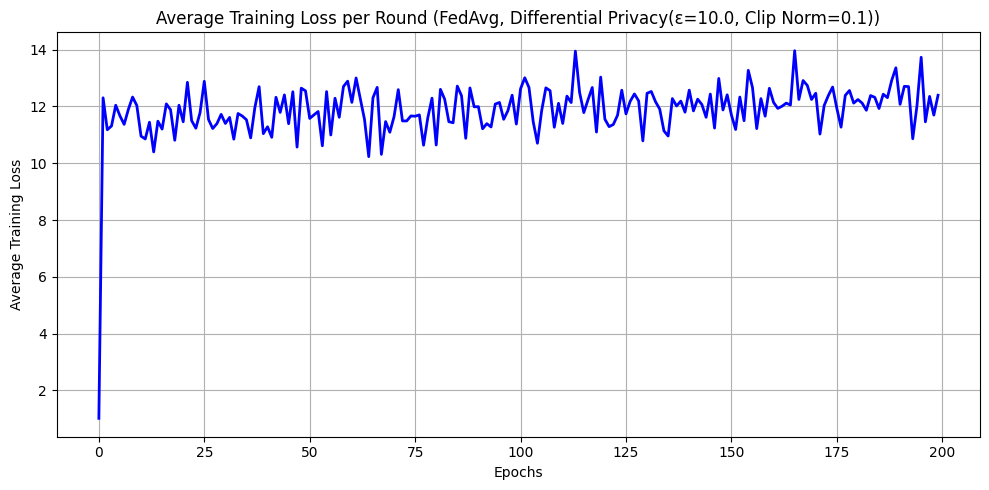

In [6]:
import numpy as np
import matplotlib.pyplot as plt

path = "../../../OpenFedLLM/server_trained_files/output_dp/fedavg_epsilon10.0_clip1.0/alpaca-gpt4_20000_fedavg_c20s2_i10_b16a1_l512_r32a64_20250528104432/training_loss.npy"
# Load training loss
training_loss = np.load(path)  # Update with your path

# Replace -1 with NaN to ignore non-participation
training_loss_with_nan = np.where(training_loss == -1, np.nan, training_loss)

# Compute average loss per round
avg_loss_per_round = np.nanmean(training_loss_with_nan, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_loss_per_round, color="blue", linewidth=2)
plt.title("Average Training Loss per Round (FedAvg, Differential Privacy(ε=10.0, Clip Norm=0.1))")
plt.xlabel("Epochs")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


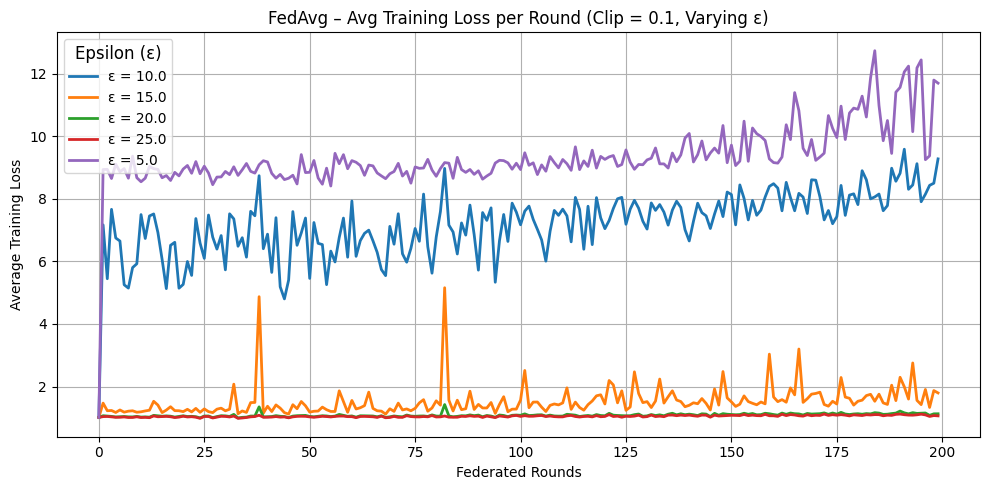

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# === CONFIGURATION ===
base_path = "../../../OpenFedLLM/server_trained_files/output_dp/"
optimizer_prefix = "fedavg_epsilon"  # Only include FedAvg runs (update if needed)
target_clip = 0.1                    # Only include this clip value

# === Plot Setup ===
plt.figure(figsize=(10, 5))

# Scan for all folders starting with optimizer_prefix
top_level_dirs = [d for d in os.listdir(base_path) if d.startswith(optimizer_prefix)]

for folder_name in sorted(top_level_dirs):
    full_top_dir = os.path.join(base_path, folder_name)

    # Parse epsilon and clip from folder name (e.g., fedavg_epsilon10.0_clip0.1)
    match = re.search(r"epsilon([0-9.]+)_clip([0-9.]+)", folder_name)
    if not match:
        print(f"⚠️ Could not parse epsilon and clip in folder: {folder_name}")
        continue

    epsilon_val = float(match.group(1))
    clip_val = float(match.group(2))

    # Filter by clip value
    if clip_val != target_clip:
        continue

    # Find first inner timestamped subfolder
    inner_dirs = [d for d in os.listdir(full_top_dir) if os.path.isdir(os.path.join(full_top_dir, d))]
    if not inner_dirs:
        print(f"⚠️ No subfolders in {full_top_dir}")
        continue

    inner_path = os.path.join(full_top_dir, inner_dirs[0])
    loss_path = os.path.join(inner_path, "training_loss.npy")

    if not os.path.exists(loss_path):
        print(f"⚠️ No training_loss.npy in {inner_path}")
        continue

    # Load and process training loss
    training_loss = np.load(loss_path)
    training_loss = np.where(training_loss == -1, np.nan, training_loss)
    avg_loss_per_round = np.nanmean(training_loss, axis=0)

    # Plot average loss per round for this epsilon
    plt.plot(avg_loss_per_round, linewidth=2, label=f"ε = {epsilon_val}")

# === Final Plot Settings ===
plt.title(f"FedAvg – Avg Training Loss per Round (Clip = {target_clip}, Varying ε)")
plt.xlabel("Federated Rounds")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.legend(title="Epsilon (ε)", fontsize="medium", title_fontsize="large")
plt.tight_layout()
plt.show()


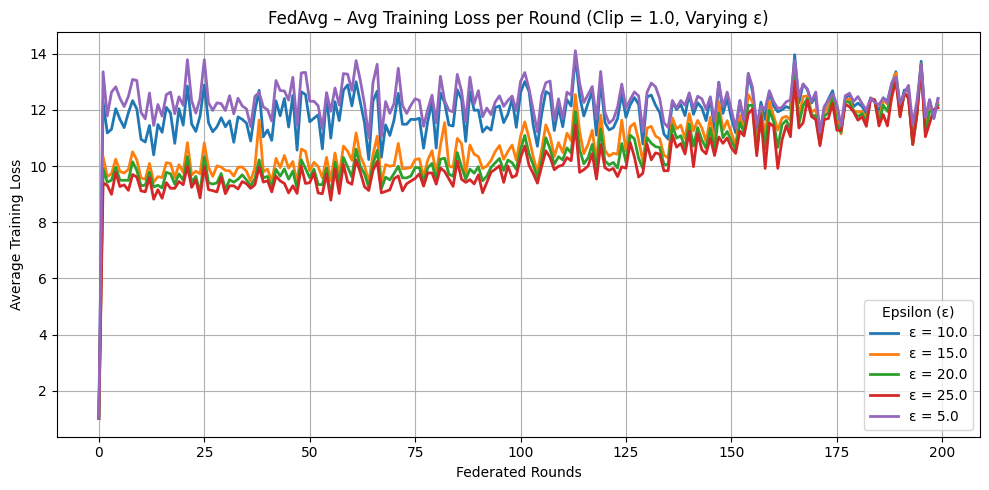

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# === CONFIGURATION ===
base_path = "../../../OpenFedLLM/server_trained_files/output_dp/"
optimizer_prefix = "fedavg_epsilon"  # Only include FedAvg runs (update if needed)
target_clip = 1.0                   # Only include this clip value

# === Plot Setup ===
plt.figure(figsize=(10, 5))

# Scan for all folders starting with optimizer_prefix
top_level_dirs = [d for d in os.listdir(base_path) if d.startswith(optimizer_prefix)]

for folder_name in sorted(top_level_dirs):
    full_top_dir = os.path.join(base_path, folder_name)

    # Parse epsilon and clip from folder name (e.g., fedavg_epsilon10.0_clip0.1)
    match = re.search(r"epsilon([0-9.]+)_clip([0-9.]+)", folder_name)
    if not match:
        print(f"⚠️ Could not parse epsilon and clip in folder: {folder_name}")
        continue

    epsilon_val = float(match.group(1))
    clip_val = float(match.group(2))

    # Filter by clip value
    if clip_val != target_clip:
        continue

    # Find first inner timestamped subfolder
    inner_dirs = [d for d in os.listdir(full_top_dir) if os.path.isdir(os.path.join(full_top_dir, d))]
    if not inner_dirs:
        print(f"⚠️ No subfolders in {full_top_dir}")
        continue

    inner_path = os.path.join(full_top_dir, inner_dirs[0])
    loss_path = os.path.join(inner_path, "training_loss.npy")

    if not os.path.exists(loss_path):
        print(f"⚠️ No training_loss.npy in {inner_path}")
        continue

    # Load and process training loss
    training_loss = np.load(loss_path)
    training_loss = np.where(training_loss == -1, np.nan, training_loss)
    avg_loss_per_round = np.nanmean(training_loss, axis=0)

    # Plot average loss per round for this epsilon
    plt.plot(avg_loss_per_round, linewidth=2, label=f"ε = {epsilon_val}")

# === Final Plot Settings ===
plt.title(f"FedAvg – Avg Training Loss per Round (Clip = {target_clip}, Varying ε)")
plt.xlabel("Federated Rounds")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.legend(title="Epsilon (ε)")
plt.tight_layout()
plt.show()


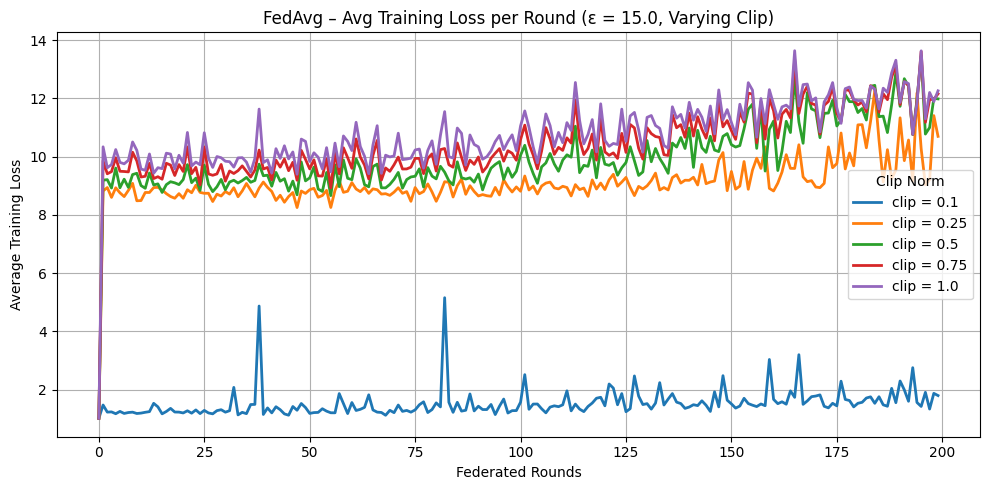

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# === CONFIGURATION ===
base_path = "../../../OpenFedLLM/server_trained_files/output_dp/"
optimizer_prefix = "fedavg_epsilon"  # Update for your optimizer prefix if needed
fixed_epsilon = 15.0                  # FIX this epsilon value here

# === Plot Setup ===
plt.figure(figsize=(10, 5))

# Find all folders matching optimizer prefix and fixed epsilon
top_level_dirs = [d for d in os.listdir(base_path) if d.startswith(optimizer_prefix)]

for folder_name in sorted(top_level_dirs):
    # Parse epsilon and clip from folder name e.g. fedavg_epsilon10.0_clip0.1
    match = re.search(r"epsilon([0-9.]+)_clip([0-9.]+)", folder_name)
    if not match:
        print(f"⚠️ Could not parse epsilon and clip in folder: {folder_name}")
        continue

    epsilon_val = float(match.group(1))
    clip_val = float(match.group(2))

    # Only include folders with the fixed epsilon
    if epsilon_val != fixed_epsilon:
        continue

    full_top_dir = os.path.join(base_path, folder_name)

    # Find first inner timestamped subfolder
    inner_dirs = [d for d in os.listdir(full_top_dir) if os.path.isdir(os.path.join(full_top_dir, d))]
    if not inner_dirs:
        print(f"⚠️ No subfolders in {full_top_dir}")
        continue

    inner_path = os.path.join(full_top_dir, inner_dirs[0])
    loss_path = os.path.join(inner_path, "training_loss.npy")

    if not os.path.exists(loss_path):
        print(f"⚠️ No training_loss.npy in {inner_path}")
        continue

    # Load and process training loss
    training_loss = np.load(loss_path)
    training_loss = np.where(training_loss == -1, np.nan, training_loss)
    avg_loss_per_round = np.nanmean(training_loss, axis=0)

    # Plot average loss per round for this clip value
    plt.plot(avg_loss_per_round, linewidth=2, label=f"clip = {clip_val}")

# === Final Plot Settings ===
plt.title(f"FedAvg – Avg Training Loss per Round (ε = {fixed_epsilon}, Varying Clip)")
plt.xlabel("Federated Rounds")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.legend(title="Clip Norm")
plt.tight_layout()
plt.show()


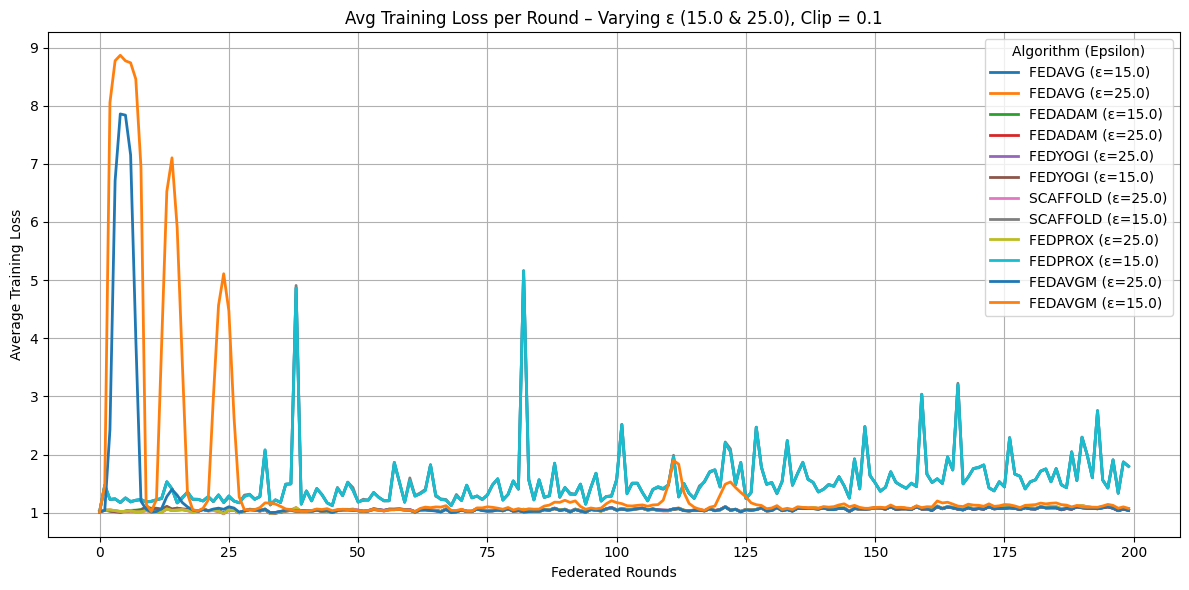

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# === CONFIGURATION ===
base_path = "../../../OpenFedLLM/server_trained_files/output_dp/"
algorithms = ["fedavg", "fedadam", "fedyogi", "fedadagrad", "scaffold", "fedprox", "fedavgm"]
target_epsilons = [15.0, 25.0]
target_clip = 0.1

# === Plot Setup ===
plt.figure(figsize=(12, 6))

for algo in algorithms:
    prefix = f"{algo}_epsilon"
    
    for folder_name in os.listdir(base_path):
        if not folder_name.startswith(prefix):
            continue
        
        # Match epsilon and clip from folder name
        match = re.search(rf"{algo}_epsilon([0-9.]+)_clip([0-9.]+)", folder_name)
        if not match:
            continue
        
        epsilon_val = float(match.group(1))
        clip_val = float(match.group(2))
        
        if epsilon_val not in target_epsilons or clip_val != target_clip:
            continue

        # === Build full path to training_loss.npy ===
        top_dir = os.path.join(base_path, folder_name)
        inner_dirs = [d for d in os.listdir(top_dir) if os.path.isdir(os.path.join(top_dir, d))]
        if not inner_dirs:
            print(f"⚠️ No subfolders in {top_dir}")
            continue

        inner_path = os.path.join(top_dir, inner_dirs[0])
        loss_path = os.path.join(inner_path, "training_loss.npy")
        if not os.path.exists(loss_path):
            print(f"⚠️ No training_loss.npy in {inner_path}")
            continue

        # === Load and process training loss ===
        training_loss = np.load(loss_path)
        training_loss = np.where(training_loss == -1, np.nan, training_loss)
        avg_loss = np.nanmean(training_loss, axis=0)

        # Plot with label indicating algorithm and epsilon
        plt.plot(avg_loss, linewidth=2, label=f"{algo.upper()} (ε={epsilon_val})")

# === Final Plot Settings ===
plt.title("Avg Training Loss per Round – Varying ε (15.0 & 25.0), Clip = 0.1")
plt.xlabel("Federated Rounds")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.legend(title="Algorithm (Epsilon)", fontsize=10)
plt.tight_layout()
plt.show()


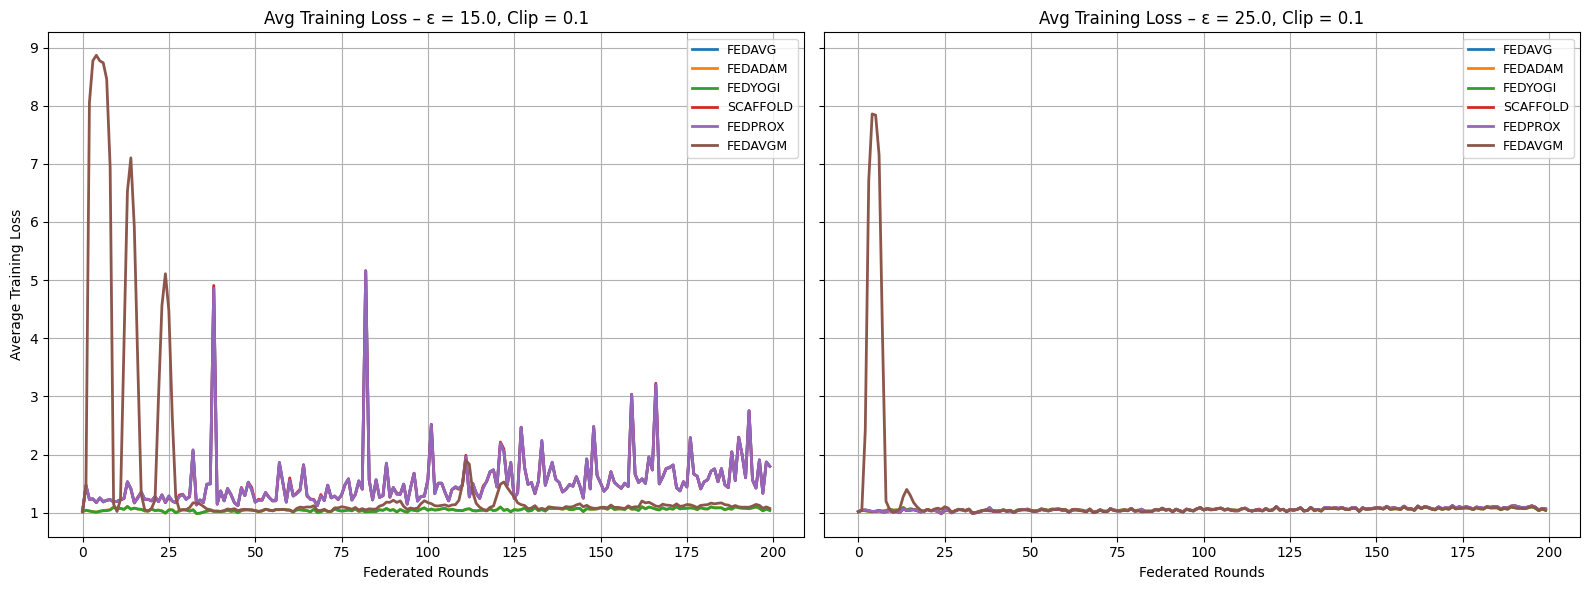

In [22]:
# === Plot Setup ===
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
epsilon_titles = {15.0: "ε = 15.0", 25.0: "ε = 25.0"}

for i, epsilon_target in enumerate(target_epsilons):
    ax = axs[i]
    
    for algo in algorithms:
        prefix = f"{algo}_epsilon"
        
        for folder_name in os.listdir(base_path):
            if not folder_name.startswith(prefix):
                continue
            
            # Match epsilon and clip from folder name
            match = re.search(rf"{algo}_epsilon([0-9.]+)_clip([0-9.]+)", folder_name)
            if not match:
                continue
            
            epsilon_val = float(match.group(1))
            clip_val = float(match.group(2))
            
            if epsilon_val != epsilon_target or clip_val != target_clip:
                continue

            # Build full path
            top_dir = os.path.join(base_path, folder_name)
            inner_dirs = [d for d in os.listdir(top_dir) if os.path.isdir(os.path.join(top_dir, d))]
            if not inner_dirs:
                print(f"⚠️ No subfolders in {top_dir}")
                continue

            inner_path = os.path.join(top_dir, inner_dirs[0])
            loss_path = os.path.join(inner_path, "training_loss.npy")
            if not os.path.exists(loss_path):
                print(f"⚠️ No training_loss.npy in {inner_path}")
                continue

            # Load loss
            training_loss = np.load(loss_path)
            training_loss = np.where(training_loss == -1, np.nan, training_loss)
            avg_loss = np.nanmean(training_loss, axis=0)

            # Plot
            ax.plot(avg_loss, linewidth=2, label=f"{algo.upper()}")

    ax.set_title(f"Avg Training Loss – {epsilon_titles[epsilon_target]}, Clip = {target_clip}")
    ax.set_xlabel("Federated Rounds")
    ax.grid(True)
    ax.legend(fontsize=9)

axs[0].set_ylabel("Average Training Loss")
plt.tight_layout()
plt.show()


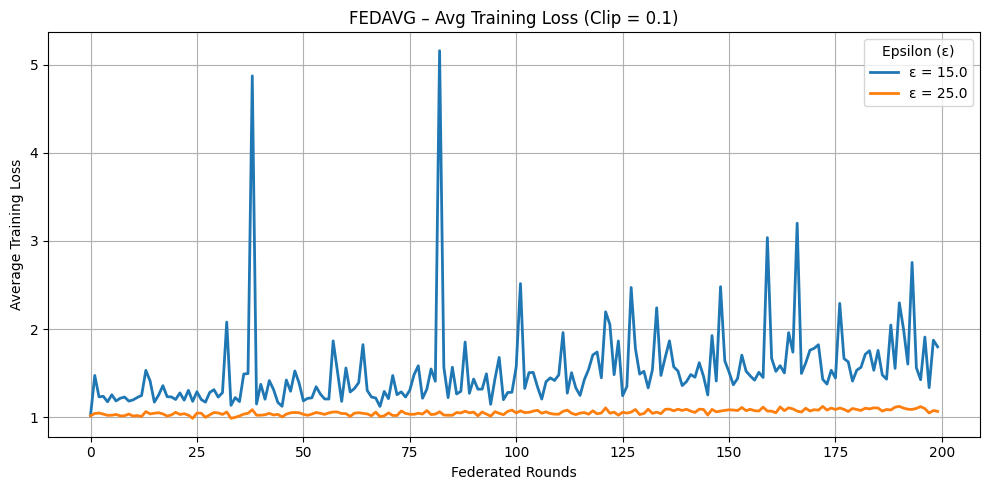

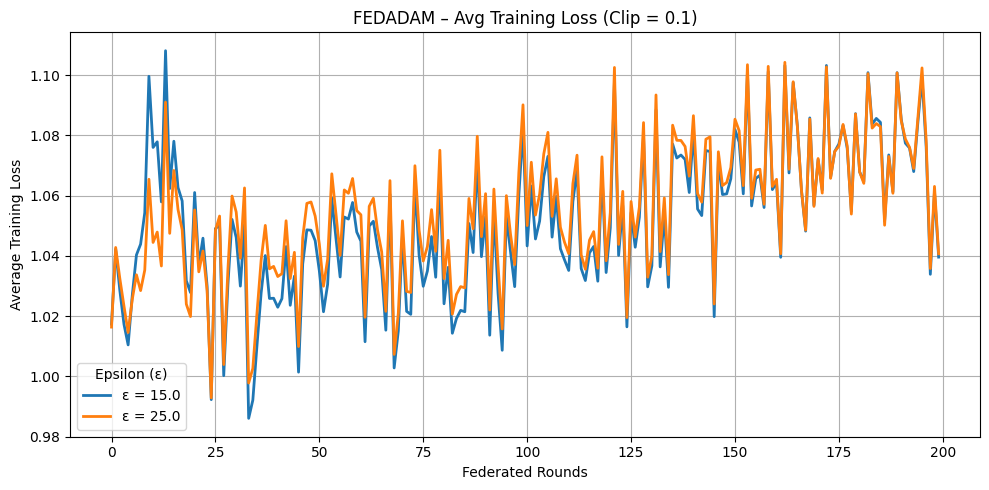

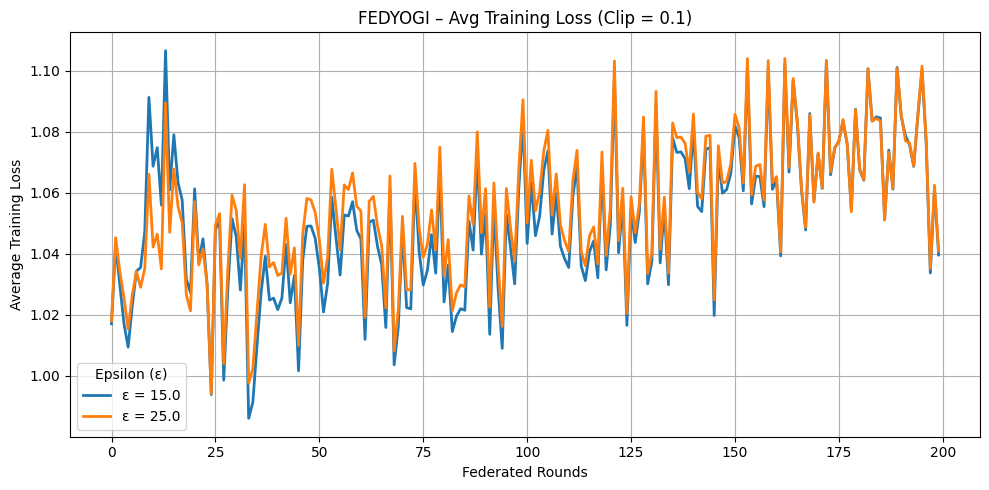

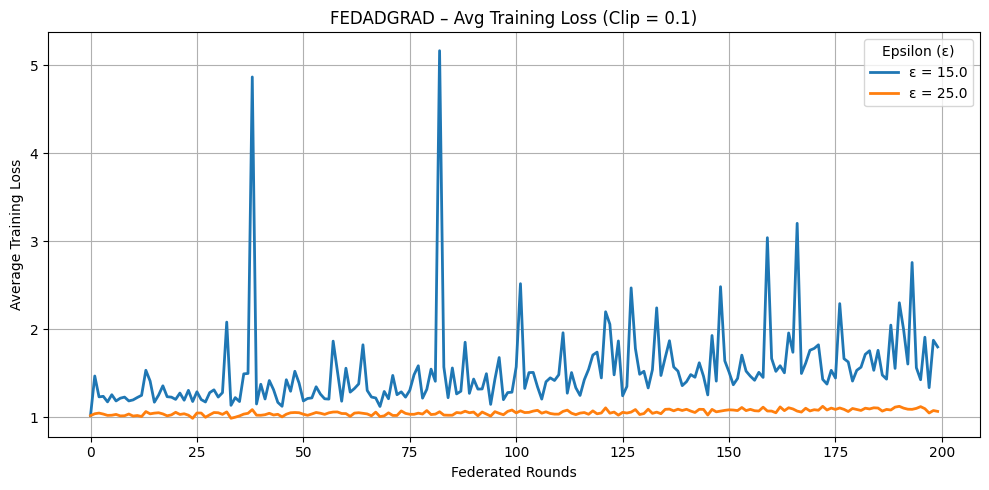

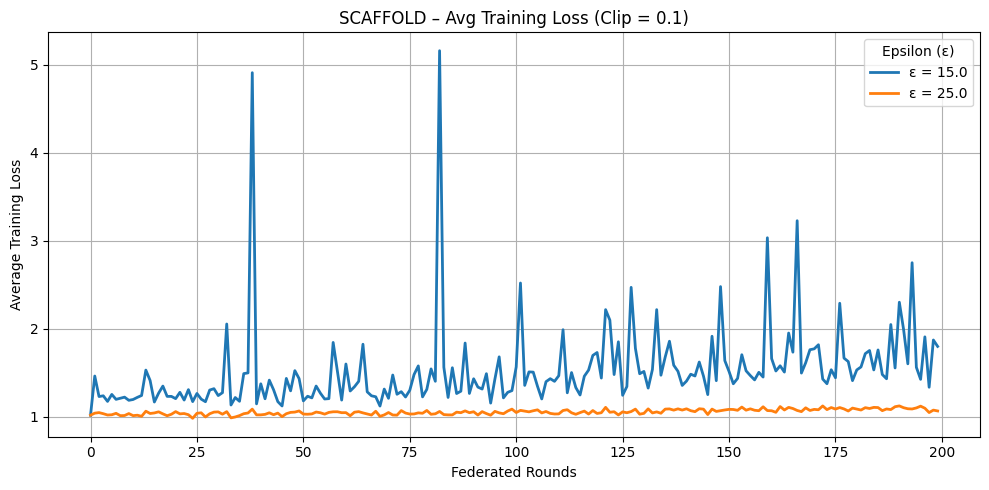

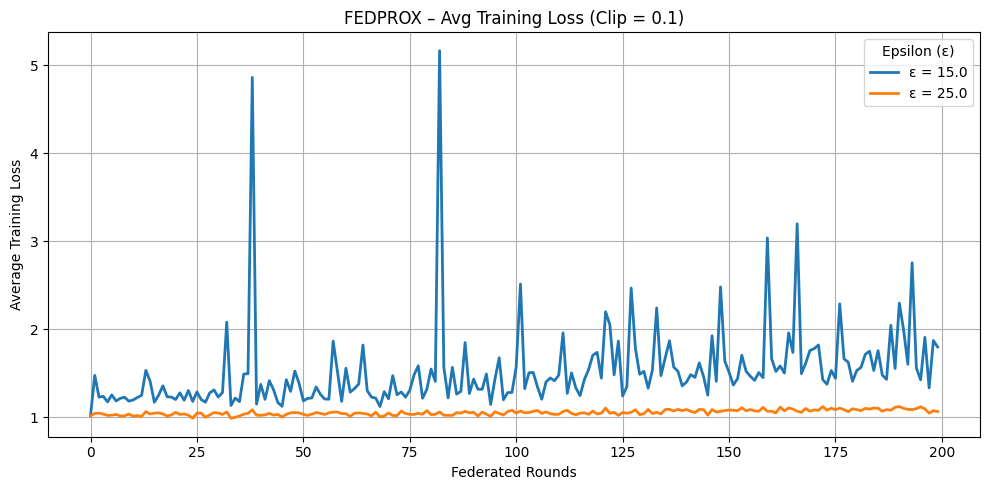

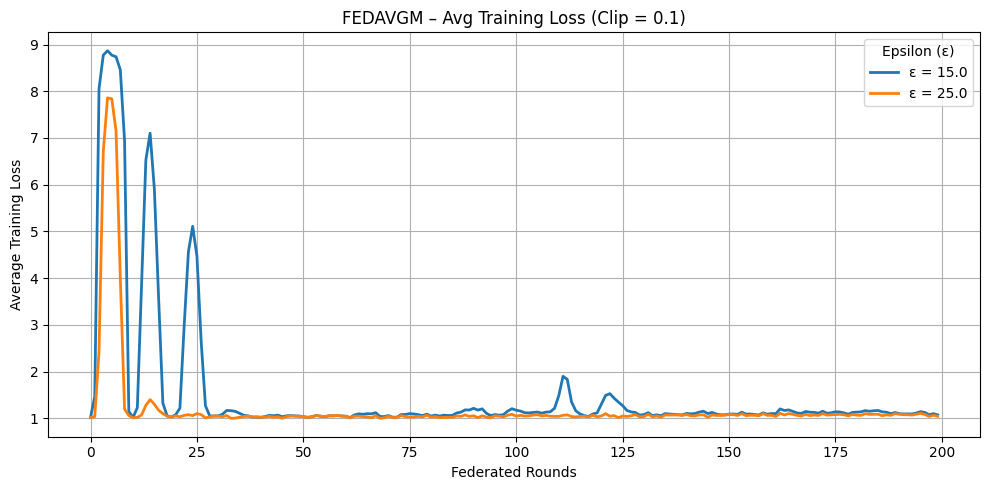

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# === CONFIGURATION ===
base_path = "../../../OpenFedLLM/server_trained_files/output_dp/"
algorithms = ["fedavg", "fedadam", "fedyogi", "fedadgrad", "scaffold", "fedprox", "fedavgm"]
target_epsilons = [15.0, 25.0]
target_clip = 0.1

# === Iterate over algorithms ===
for algo in algorithms:
    plt.figure(figsize=(10, 5))
    found = False  # Track if we plotted anything

    for epsilon_val in target_epsilons:
        folder_prefix = f"{algo}_epsilon{epsilon_val}_clip{target_clip}"

        # Find matching folder
        matching_folders = [d for d in os.listdir(base_path) if d.startswith(folder_prefix)]
        if not matching_folders:
            print(f"⚠️ No data for {algo} with ε={epsilon_val}, clip={target_clip}")
            continue

        folder_name = matching_folders[0]
        top_dir = os.path.join(base_path, folder_name)
        inner_dirs = [d for d in os.listdir(top_dir) if os.path.isdir(os.path.join(top_dir, d))]
        if not inner_dirs:
            continue

        inner_path = os.path.join(top_dir, inner_dirs[0])
        loss_path = os.path.join(inner_path, "training_loss.npy")
        if not os.path.exists(loss_path):
            continue

        # Load and process training loss
        training_loss = np.load(loss_path)
        training_loss = np.where(training_loss == -1, np.nan, training_loss)
        avg_loss = np.nanmean(training_loss, axis=0)

        plt.plot(avg_loss, linewidth=2, label=f"ε = {epsilon_val}")
        found = True

    if found:
        # Final plot settings
        plt.title(f"{algo.upper()} – Avg Training Loss (Clip = {target_clip})")
        plt.xlabel("Federated Rounds")
        plt.ylabel("Average Training Loss")
        plt.grid(True)
        plt.legend(title="Epsilon (ε)")
        plt.tight_layout()

        # Optionally save the figure
        plt.savefig(f"{algo}_epsilon_comparison_clip{target_clip}.png", dpi=300)
        plt.show()
    else:
        print(f"⚠️ No data found for algorithm: {algo}")
